In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("hangboard_data.csv")
data.head()

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,1,1,1.30,22
1,1,2022-12-23,1,2,1,0.80,22
2,1,2022-12-23,2,1,1,1.70,22
3,1,2022-12-23,2,2,1,2.46,22
4,1,2022-12-23,3,1,1,2.02,22


In [3]:
new_data = data.copy()
new_data.head()

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,1,1,1.30,22
1,1,2022-12-23,1,2,1,0.80,22
2,1,2022-12-23,2,1,1,1.70,22
3,1,2022-12-23,2,2,1,2.46,22
4,1,2022-12-23,3,1,1,2.02,22


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            90 non-null     int64  
 1   date           90 non-null     object 
 2   set            90 non-null     int64  
 3   arm            90 non-null     int64  
 4   position       90 non-null     int64  
 5   duration(sec)  90 non-null     float64
 6   size(mm)       90 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.0+ KB


# Handling dtypes

In [5]:
def dtype(arg):
    data[arg] = data[arg].astype('string')
data['date'] = pd.to_datetime(data['date'])


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   day            90 non-null     int64         
 1   date           90 non-null     datetime64[ns]
 2   set            90 non-null     int64         
 3   arm            90 non-null     int64         
 4   position       90 non-null     int64         
 5   duration(sec)  90 non-null     float64       
 6   size(mm)       90 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 5.0 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,90.0,3.000000,1.422136,1.0,2.0000,3.000,4.0000,5.00
set,90.0,2.000000,0.821071,1.0,1.0000,2.000,3.0000,3.00
arm,90.0,1.500000,0.502801,1.0,1.0000,1.500,2.0000,2.00
position,90.0,2.000000,0.821071,1.0,1.0000,2.000,3.0000,3.00
duration(sec),90.0,3.156222,1.628697,0.8,1.8125,2.825,3.9625,7.46
size(mm),90.0,22.000000,0.000000,22.0,22.0000,22.000,22.0000,22.00


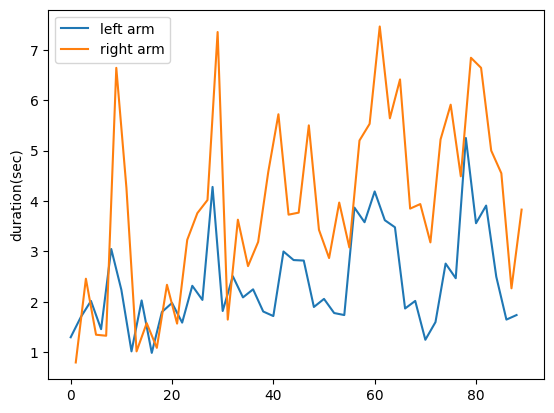

In [8]:
data.groupby('arm')['duration(sec)'].plot();
plt.ylabel('duration(sec)');
plt.legend(['left arm', 'right arm']);

In [9]:
groupby_day = data.groupby('day')
groupby_day.head()

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,1,1,1.30,22
1,1,2022-12-23,1,2,1,0.80,22
2,1,2022-12-23,2,1,1,1.70,22
3,1,2022-12-23,2,2,1,2.46,22
4,1,2022-12-23,3,1,1,2.02,22
18,2,2022-12-26,1,1,1,1.80,22
19,2,2022-12-26,1,2,1,2.34,22
20,2,2022-12-26,2,1,1,1.98,22
21,2,2022-12-26,2,2,1,1.57,22
22,2,2022-12-26,3,1,1,1.59,22


In [10]:
for day, data in groupby_day:
    print(day);
    print(groupby_day);

1
2
3
4
5


In [11]:
groupby_day.get_group(1)

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,1,1,1.30,22
1,1,2022-12-23,1,2,1,0.80,22
2,1,2022-12-23,2,1,1,1.70,22
3,1,2022-12-23,2,2,1,2.46,22
4,1,2022-12-23,3,1,1,2.02,22
5,1,2022-12-23,3,2,1,1.35,22
6,1,2022-12-23,1,1,2,1.46,22
7,1,2022-12-23,1,2,2,1.33,22
8,1,2022-12-23,2,1,2,3.05,22
9,1,2022-12-23,2,2,2,6.64,22


# Aggregate

In [12]:
groupby_day.mean(numeric_only=True)

,set,arm,position,duration(sec),size(mm)
day,,,,,
1,2.0,1.5,2.0,2.018889,22.0
2,2.0,1.5,2.0,2.816111,22.0
3,2.0,1.5,2.0,3.162778,22.0
4,2.0,1.5,2.0,3.883889,22.0
5,2.0,1.5,2.0,3.899444,22.0


In [13]:
data.groupby('position')['duration(sec)'].mean()

position
1    3.741667
2    5.200000
3    2.756667
Name: duration(sec), dtype: float64

# Comparing arm capacity

In [14]:
left_hang = data[data['arm']== 1]
left_hang['duration(sec)'].sum()

25.44

In [15]:
right_hang = data[data['arm']== 2]
right_hang['duration(sec)'].sum()

44.75

In [16]:
lh = left_hang.groupby('position')['duration(sec)'].mean()
left_hang_mean = pd.DataFrame(lh)
left_hang_mean

,duration(sec)
position,
1,2.276667
2,4.240000
3,1.963333


In [17]:
rh = right_hang.groupby('position')['duration(sec)'].mean()
right_hang_mean = pd.DataFrame(rh) 
right_hang_mean

,duration(sec)
position,
1,5.206667
2,6.160000
3,3.550000


In [18]:
frames = [left_hang_mean, right_hang_mean]
mean_comparison = pd.concat(frames)
mean_comparison

,duration(sec)
position,
1,2.276667
2,4.240000
3,1.963333
1,5.206667
2,6.160000
3,3.550000
